# Covered Call

This [strategy](https://www.investopedia.com/terms/c/coveredcall.asp) involves purchasing a number of shares and simultaneously selling the same number of call options. 

If the stock price is below the strike price of the call options at expiration, the trader keeps the shares and pockets the option premium.

On the other hand, if the stock price rises above the strike price, it is sufficient to deliver the shares to the buyer of the call options at expiration for the option's strike price.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function
import sys
from optionlab import __version__
from optionlab.strategy import Strategy
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("optionlab version: %s" % __version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
optionlab version: 0.1


A *Strategy* object is instantiated.

In [3]:
st=Strategy()

The data used in the calculations are passed to the *getdata()* method of the newly created *Strategy* object.

In this case, the data refers to Apple stocks (ticker: APPL) on November 22, 2021. The maturity of the call option was November 17, 2021.

The covered call setup consists of buying 100 Apple shares at 164.04 and selling the same number of 175.00 strike calls for 1.15 each.

The probability of profit (PoP) was estimated on the target date, which corresponds to the option maturity.

In [4]:
distribution="black-scholes"
stockprice=164.04
volatility=0.272
startdate="2021-11-22"
targetdate="2021-12-17"
interestrate=0.0002
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"stock","n":100,"action":"buy"},
          {"type":"call","strike":175.00,"premium":1.15,"n":100,"action":"sell"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy,distribution=distribution)

The calculations are carried out by the run() method of the Strategy object and the output is stored in a Python dictionary.

In [5]:
%%time
out=st.run()

Wall time: 4.05 ms


Profit/loss profiles for each leg and the overall strategy are obtained by calling the *getPL()* method and plotted at the option's maturity.

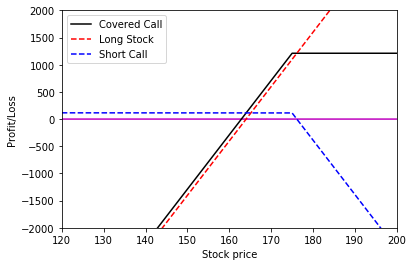

In [6]:
s,pl_total=st.getPL()
leg=[]
for i in range(len(strategy)):
    leg.append(st.getPL(i)[1])
    
zeroline=zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(120,200)
plt.ylim(-2000,2000)
plt.plot(s,zeroline,'m-')
plt.plot(s,pl_total,'k-',label="Covered Call")
plt.plot(s,leg[0],'r--',label="Long Stock")
plt.plot(s,leg[1],'b--',label="Short Call")
plt.legend(loc="upper left")

Below one can see some useful, additional results of the calculations made for the strategy, including its PoP.

In [7]:
print("Days remaining to the target date: %d" % st.days2target)
print("Strategy cost: %.2f" % out["StrategyCost"])
print("Maximum loss: %.2f" % abs(out["MinimumReturnInTheDomain"]))
print("Maximum profit: %.2f" % out["MaximumReturnInTheDomain"])
print("Profitable stock price range:")

for profrange in out["ProfitRanges"]:
    print("      %.2f ---> %.2f" % (profrange[0],profrange[1]))

print("Probability of Profit (PoP): %.1f%%" % (out["ProbabilityOfProfit"]*100.0))

Days remaining to the target date: 18
Strategy cost: -16289.00
Maximum loss: 8087.00
Maximum profit: 1211.00
Profitable stock price range:
      162.90 ---> inf
Probability of Profit (PoP): 52.4%
